### 0 and 1 Handwritten digits Recognition - Binary Classification Task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Creating a dataset of 0 and 1 digits for binary classification
X_train = X_train[(y_train == 0) | (y_train == 1)]
y_train = y_train[(y_train == 0) | (y_train == 1)]
X_test = X_test[(y_test == 0) | (y_test == 1)]
y_test = y_test[(y_test == 0) | (y_test == 1)]

In [4]:
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (12665, 28, 28)
y train shape: (12665,)
X test shape: (2115, 28, 28)
y test shape: (2115,)


In [5]:
# Reshaping
X_train = X_train.reshape((12665, -1))
y_train = y_train.reshape((12665, -1))
X_test = X_test.reshape((2115, -1))
y_test = y_test.reshape((2115, -1))

In [6]:
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (12665, 784)
y train shape: (12665, 1)
X test shape: (2115, 784)
y test shape: (2115, 1)


In [7]:
model = Sequential(
    [
        keras.Input(shape=(784,)),
        Dense(units=25, activation="sigmoid"),
        Dense(units=15, activation="sigmoid"),
        Dense(units=1, activation="sigmoid"),
    ],
    name="my_model",
)

In [8]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,031 (78.25 KB)

 Trainable params: 20,031 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
[layer1, layer2, layer3] = model.layers

In [10]:
# Examine Weights shapes
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [11]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
# epochs = number of iterations in gradient descent
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - loss: 0.3031
Epoch 2/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.0399
Epoch 3/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 0.0184
Epoch 4/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.0110
Epoch 5/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 0.0079
Epoch 6/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 0.0067
Epoch 7/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.0062
Epoch 8/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.0048
Epoch 9/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.0036
Epoch 10/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.0047
Epoch 11/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.0036
Epoch 12/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.0044
Epoch 13/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.0046
Epoch 14/20
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.0062
Epoch 15/20
396/396 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


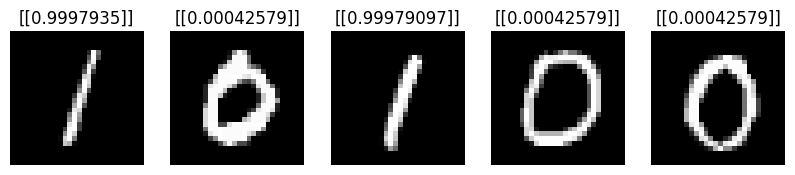

In [12]:
# Making predictions
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 2))

for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape((28, 28)), cmap='gray')
    ax.set_title(model.predict(X_test[i].reshape((1, 784))))
    ax.axis('off')
plt.show()

In [13]:
# Accuracy of the model
probabilities = model.predict(X_test)
predictions = (probabilities >= 0.5).astype(int)
accuracy = accuracy_score(y_test, predictions)
print(f"Model's accuracy score: {accuracy}")


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
Model's accuracy score: 0.9990543735224586


In [14]:
# Viewing misclassified examples
misclassified = np.argwhere(predictions != y_test)
print(f"There are {len(misclassified)} examples --> {misclassified}")

There are 2 examples --> [[1172    0]
 [2031    0]]


In [15]:
examples_id = []
for example in misclassified:
    index = example[0]
    examples_id.append(index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


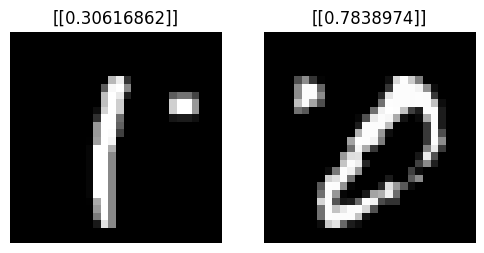

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[examples_id[i]].reshape(28, 28), cmap='gray')
    ax.set_title(model.predict(X_test[examples_id[i]].reshape((1, 784))))
    ax.axis('off')
plt.show()